In [278]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [279]:
# pip install category_encoders

In [291]:
df = pd.read_csv('XY_train.csv',encoding='latin-1')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


In [292]:
y_train = df["target"]

## Missing Values

In [293]:
df["gender"] = df["gender"].fillna("unknown")
df["company_size"] = df["company_size"].fillna("unknown")
df["company_type"] = df["company_type"].fillna("unknown")
print(df["enrolled_university"].mode())
df["enrolled_university"] = df["enrolled_university"].fillna("no_enrollment")
print(df["major_discipline"].mode())
df["major_discipline"] = df["major_discipline"].fillna("STEM")
print(df["last_new_job"].mode())
df["last_new_job"] = df["last_new_job"].fillna("1")
print(df["education_level"].mode())
df["education_level"] = df["education_level"].fillna("Graduate")
df.company_size[df.company_size=='àå÷-49' ] = '10-49'
df.company_size[df.company_size=='500-999'] = '500-1K'
df.company_size[df.company_size=='1000-4999'] = '1K-5K'
df.company_size[df.company_size=='5000-9999'] = '5K-10K'
df.company_size[df.company_size=='10000+'] = '10K+'

0    no_enrollment
dtype: object
0    STEM
dtype: object
0    1
dtype: object
0    Graduate
dtype: object


C:\Users\user\AppData\Local\Temp/ipykernel_14088/1249810363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_size[df.company_size=='àå÷-49' ] = '10-49'
C:\Users\user\AppData\Local\Temp/ipykernel_14088/1249810363.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.company_size[df.company_size=='500-999'] = '500-1K'
C:\Users\user\AppData\Local\Temp/ipykernel_14088/1249810363.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

## Featurs representation 1

### experiencs

In [294]:
print(df["experience"].unique())
df["experience"] = df["experience"].replace("<1","1")
df["experience"] = df["experience"].replace(">20","20")
df["experience"] = pd.to_numeric(df["experience"])
print(df["experience"].unique())
print(df["experience"].mode())
df["experience"] = df["experience"].fillna(20)
print(df["experience"].value_counts())
bins = [0,5,9,15,20]
labels = ["low", "low-middle", "middle-high", "high"]
df["experience"] = pd.cut(df["experience"], bins= bins, labels= labels)
print(df["experience"].value_counts())

## experience
df["experience"] = df["experience"].replace("low",0)
df["experience"] = df["experience"].replace("low-middle",1)
df["experience"] = df["experience"].replace("middle-high",2)
df["experience"] = df["experience"].replace("high",3)

df.experience= df.experience.astype(int)

df['experience'] = df['experience']/df['experience'].max()

['2' '6' '3' '4' '>20' '13' '19' '10' '1' '5' '7' '20' '14' '16' '12' '15'
 '8' '<1' '17' '9' '11' '18' nan]
[ 2.  6.  3.  4. 20. 13. 19. 10.  1.  5.  7. 14. 16. 12. 15.  8. 17.  9.
 11. 18. nan]
0    20.0
dtype: float64
20.0    2783
5.0     1161
4.0     1097
3.0     1084
6.0      979
2.0      889
1.0      841
7.0      825
9.0      804
10.0     789
8.0      636
15.0     572
11.0     525
14.0     478
16.0     403
12.0     393
13.0     313
17.0     282
19.0     249
18.0     223
Name: experience, dtype: int64
low            5072
high           3940
low-middle     3244
middle-high    3070
Name: experience, dtype: int64


In [295]:
df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
df.relevent_experience = df.relevent_experience.astype(int)

C:\Users\user\AppData\Local\Temp/ipykernel_14088/1523922599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
C:\Users\user\AppData\Local\Temp/ipykernel_14088/1523922599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1


### LabelEncoder - Order is important

In [296]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["education_level", "last_new_job", "company_size", "enrolled_university"]

## education_level
encoder= ce.OrdinalEncoder(cols=['education_level'],return_df=True,
                           mapping=[{'col':'education_level',
'mapping':{'Primary':0,'High school':1,'Graduate':2,'Masters':3,'Phd':4,}}])
df['education_level'] = encoder.fit_transform(df['education_level'])
df["education_level"] = df["education_level"].replace(-1,1)

## enrolled_university
encoder= ce.OrdinalEncoder(cols=['enrolled_university'],return_df=True,
                           mapping=[{'col':'enrolled_university',
'mapping':{'no_enrollment':0,'Part time course':1,'Full time course':2,}}])
df['enrolled_university'] = encoder.fit_transform(df['enrolled_university'])

## last_new_job
encoder= ce.OrdinalEncoder(cols=['last_new_job'],return_df=True,
                           mapping=[{'col':'last_new_job',
'mapping':{'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}}])
df['last_new_job'] = encoder.fit_transform(df['last_new_job'])

## company_size
encoder= ce.OrdinalEncoder(cols=['company_size'],return_df=True,
                           mapping=[{'col':'company_size',
'mapping':{'unknown':0,'<10':1,'10-49':2,'50-99':3,'100-500':4,'500-1K':5,'1K-5K':6,'5K-10K':7,'10K+':8}}])
df['company_size'] = encoder.fit_transform(df['company_size'])

### Get Dummies - Order is Not important

In [297]:
## gender
encoder=ce.OneHotEncoder(cols='gender',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.gender)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="gender")
df.head(10)

## major_discipline
encoder=ce.OneHotEncoder(cols='major_discipline',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.major_discipline)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="major_discipline")

## company_type
encoder=ce.OneHotEncoder(cols='company_type',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.company_type)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="company_type")

### Normalize

In [298]:
max_training_hours = df["training_hours"].max()
min_training_hours = df["training_hours"].min()
df["training_hours"] = (df["training_hours"]-min_training_hours)/(max_training_hours-min_training_hours)

max_city_development_index = df["city_development_index"].max()
min_city_development_index = df["city_development_index"].min()
df["city_development_index"] = (df["city_development_index"]-min_city_development_index)/(max_city_development_index-min_city_development_index)

df['education_level'] = df['education_level']/df['education_level'].max()

df['enrolled_university'] = df['enrolled_university']/df['enrolled_university'].max()

### Standardization of continuous Variable

In [299]:
x_train = df.drop(columns =["enrollee_id", "city","target"])
x_train, y_train

(       city_development_index  relevent_experience  enrolled_university  \
 0                    0.922156                    0                  0.0   
 1                    0.896208                    1                  0.0   
 2                    0.922156                    0                  0.0   
 3                    0.922156                    0                  0.0   
 4                    0.213573                    1                  1.0   
 ...                       ...                  ...                  ...   
 15321                0.942116                    0                  0.0   
 15322                0.834331                    0                  1.0   
 15323                0.888224                    1                  0.0   
 15324                0.351297                    0                  1.0   
 15325                0.834331                    1                  0.0   
 
        education_level  experience  company_size  last_new_job  \
 0                 

## Featurs representation 2

In [176]:
df["experience"] = df["experience"].replace("<1","0")
df["experience"] = df["experience"].replace(">20","21")
df["experience"] = pd.to_numeric(df["experience"])
df["experience"] = df["experience"].fillna(0)
print(df["experience"].value_counts())

21.0    2620
5.0     1161
4.0     1097
3.0     1084
6.0      979
2.0      889
7.0      825
9.0      804
10.0     789
8.0      636
15.0     572
11.0     525
14.0     478
0.0      454
1.0      435
16.0     403
12.0     393
13.0     313
17.0     282
19.0     249
18.0     223
20.0     115
Name: experience, dtype: int64


In [177]:
df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
df.relevent_experience = df.relevent_experience.astype(int)

C:\Users\user\AppData\Local\Temp/ipykernel_14088/1523922599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
C:\Users\user\AppData\Local\Temp/ipykernel_14088/1523922599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1


In [178]:
cols = ["education_level", "last_new_job", "company_size", "enrolled_university"]

## education_level
encoder= ce.OrdinalEncoder(cols=['education_level'],return_df=True,
                           mapping=[{'col':'education_level',
'mapping':{'Primary':0,'High school':1,'Graduate':2,'Masters':3,'Phd':4,}}])
df['education_level'] = encoder.fit_transform(df['education_level'])
df["education_level"] = df["education_level"].replace(-1,1)

## enrolled_university
encoder= ce.OrdinalEncoder(cols=['enrolled_university'],return_df=True,
                           mapping=[{'col':'enrolled_university',
'mapping':{'no_enrollment':0,'Part time course':1,'Full time course':2,}}])
df['enrolled_university'] = encoder.fit_transform(df['enrolled_university'])

## last_new_job
encoder= ce.OrdinalEncoder(cols=['last_new_job'],return_df=True,
                           mapping=[{'col':'last_new_job',
'mapping':{'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}}])
df['last_new_job'] = encoder.fit_transform(df['last_new_job'])

## company_size
encoder= ce.OrdinalEncoder(cols=['company_size'],return_df=True,
                           mapping=[{'col':'company_size',
'mapping':{'unknown':0,'<10':1,'10-49':2,'50-99':3,'100-500':4,'500-1K':5,'1K-5K':6,'5K-10K':7,'10K+':8}}])
df['company_size'] = encoder.fit_transform(df['company_size'])

In [179]:
df['city'] = df.groupby("city")["target"].transform("mean")
df['gender'] = df.groupby("gender")["target"].transform("mean")
df['major_discipline'] = df.groupby("major_discipline")["target"].transform("mean")
df['company_type'] = df.groupby("company_type")["target"].transform("mean")

In [180]:
max_training_hours = df["training_hours"].max()
min_training_hours = df["training_hours"].min()
df["training_hours"] = (df["training_hours"]-min_training_hours)/(max_training_hours-min_training_hours)


max_experience = df["experience"].max()
min_experience = df["experience"].min()
df["experience"] = (df["experience"]-min_experience)/(max_experience-min_experience)
df.head()


#Categorical Variables

df['enrolled_university'] = df['enrolled_university']/df['enrolled_university'].max()
df['education_level'] = df['education_level']/df['education_level'].max()
df['company_size'] = df['company_size']/df['company_size'].max()
df['last_new_job'] = df['last_new_job']/df['last_new_job'].max()


In [183]:
x_train = df.drop(columns =["enrollee_id","target"])
y_target = df["target"]

In [184]:
x_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.115942,0.910,0.310250,0,0.0,0.25,0.251643,0.095238,0.00,0.386405,0.0,0.044776
1,0.109937,0.897,0.227299,1,0.0,0.75,0.251643,0.285714,0.75,0.182893,0.2,0.779104
2,0.115942,0.910,0.227299,0,0.0,0.50,0.251643,0.142857,0.00,0.386405,0.0,0.068657
3,0.115942,0.910,0.227299,0,0.0,0.25,0.251643,0.142857,0.00,0.386405,0.2,0.101493
4,0.586957,0.555,0.227299,1,1.0,0.50,0.251643,0.190476,0.00,0.386405,0.2,0.125373
...,...,...,...,...,...,...,...,...,...,...,...,...
15321,0.208683,0.920,0.310250,0,0.0,0.50,0.251643,1.000000,0.00,0.386405,1.0,0.071642
15322,0.116883,0.866,0.227299,0,1.0,0.25,0.251643,0.190476,0.00,0.386405,0.0,0.361194
15323,0.096774,0.893,0.227299,1,0.0,0.75,0.251643,0.476190,0.25,0.222672,0.4,0.167164
15324,0.597739,0.624,0.310250,0,1.0,0.50,0.251643,0.238095,0.00,0.386405,0.0,0.044776


## Featurs Selection

### Information Gain

city                      0.074097
city_development_index    0.071323
company_size              0.032820
company_type              0.022909
experience                0.021285
enrolled_university       0.010294
education_level           0.010067
relevent_experience       0.009076
major_discipline          0.005071
gender                    0.004456
dtype: float64


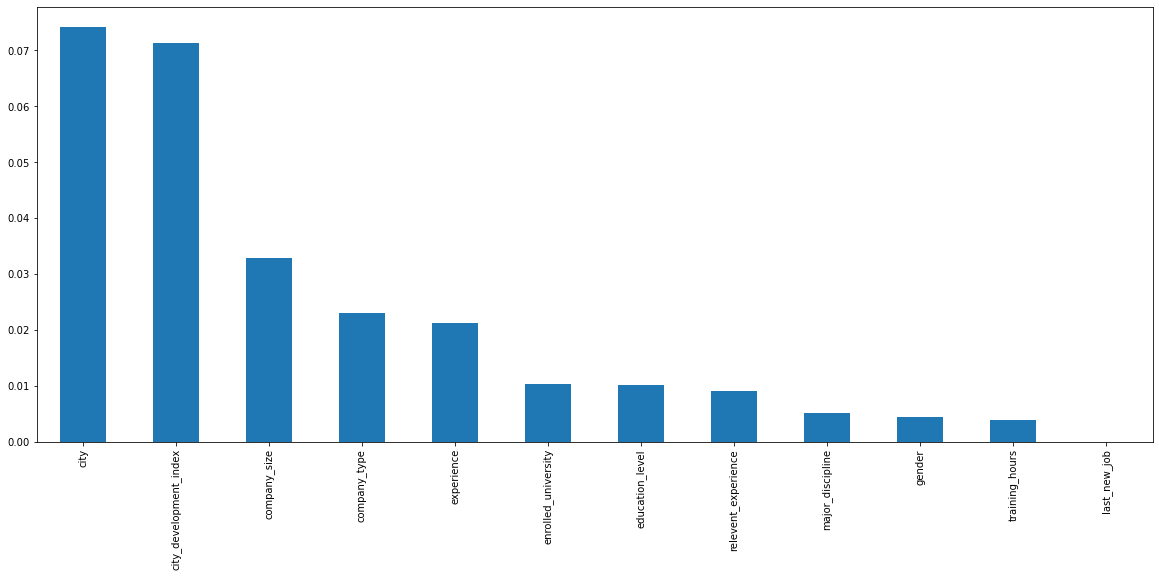

In [192]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
best_15_features = mutual_info.sort_values(ascending=False)[:10]
print(best_15_features)

In [193]:
best_15_feature_names = best_15_features.index
print(best_15_feature_names)

Index(['city', 'city_development_index', 'company_size', 'company_type',
       'experience', 'enrolled_university', 'education_level',
       'relevent_experience', 'major_discipline', 'gender'],
      dtype='object')


In [194]:
x_train = x_train[best_15_feature_names]
x_train

,city,city_development_index,company_size,company_type,experience,enrolled_university,education_level,relevent_experience,major_discipline,gender
0,0.115942,0.910,0.00,0.386405,0.095238,0.0,0.25,0,0.251643,0.310250
1,0.109937,0.897,0.75,0.182893,0.285714,0.0,0.75,1,0.251643,0.227299
2,0.115942,0.910,0.00,0.386405,0.142857,0.0,0.50,0,0.251643,0.227299
3,0.115942,0.910,0.00,0.386405,0.142857,0.0,0.25,0,0.251643,0.227299
4,0.586957,0.555,0.00,0.386405,0.190476,1.0,0.50,1,0.251643,0.227299
...,...,...,...,...,...,...,...,...,...,...
15321,0.208683,0.920,0.00,0.386405,1.000000,0.0,0.50,0,0.251643,0.310250
15322,0.116883,0.866,0.00,0.386405,0.190476,1.0,0.25,0,0.251643,0.227299
15323,0.096774,0.893,0.25,0.222672,0.476190,0.0,0.75,1,0.251643,0.227299
15324,0.597739,0.624,0.00,0.386405,0.238095,1.0,0.50,0,0.251643,0.310250


## Spilt for train and test sets

In [300]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")
print("Train\n-----------\n", pd.value_counts(Y_train)/y_train.shape[0])
print("\nTest\n-----------\n", pd.value_counts(Y_test)/Y_test.shape[0])

Train size: (12260, 25)
Test size: (3066, 25)
Train
-----------
 0    0.599504
1    0.200444
Name: target, dtype: float64

Test
-----------
 0    0.754403
1    0.245597
Name: target, dtype: float64


# Model Training

## Decision Tree (DT)

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

### Baseline

In [302]:
model_DT = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_DT.fit(X_train, Y_train)
print("Roc_Auc_Score: train_set",roc_auc_score(Y_train, model_DT.predict(X_train)))
print("Roc_Auc_Score: val_set",roc_auc_score(Y_test, model_DT.predict(X_test)))

Roc_Auc_Score: train_set 0.995279451911914
Roc_Auc_Score: val_set 0.6240390793074997


### Hyperparameter tuning - GridSearch

In [108]:
from sklearn.model_selection import GridSearchCV

In [306]:
param_DT = {
            "max_depth": np.arange(2, 35, 1),
            "criterion": ['entropy', 'gini'],
            "max_features": ["sqr", 'log2', None],
                # np.arange(20, 100, 20)
             
    
             }
model_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_DT,
                           refit=True,
                           cv=5)

In [307]:
model_DT.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 265, in fit
    raise ValueError("Invalid value for max_features. "
ValueError: Invalid value for max_features. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-tes

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.76003263 0.78711256        nan 0.76003263 0.7867863
        nan 0.78588907 0.78458401        nan 0.76468189 0.78743883
        nan 0.7774062  0.79265905        nan 0.77324633 0.791354
        nan 0.77960848 0.7906199         nan 0.77373573 0.78792822
        nan 0.77112561 0.78858075        nan 0.77642741 0.77895595
        nan 0.76655791 0.77748777        nan 0.76256117 0.77324633
        nan 0.77014682 0.77096248        nan 0.758646   0.76541599
        nan 0.76035889 0.76109299        nan 0.7588907  0.75546493
        nan 0.75473083 0.75114192        nan 0.74437194 0.74461664
        nan 0.74094617 0.74290375        nan 0.74314845 0.74200653
        nan 0.73898858 0.73719413        nan 0.73401305 0.73572594
        nan 0.73915171 0.73336052        nan 0.72895595 0.7324633
        nan 0.73091354 0.72928222        nan 0.72381729 0.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'max_features': ['sqr', 'log2', None]})

In [308]:
best_model_DT = model_DT.best_estimator_
print(model_DT.best_params_)
print("Roc_Auc_Score: train_set",roc_auc_score(Y_train, best_model_DT.predict(X_train)))
print("Roc_Auc_Score: val_set ",roc_auc_score(Y_test, best_model_DT.predict(X_test)))

{'criterion': 'gini', 'max_depth': 6, 'max_features': None}
Roc_Auc_Score: train_set 0.7368361755822812
Roc_Auc_Score: val_set  0.7002599201120293


### Plot to importent featurs

Text(0.5, 1.0, '5 importent featurs')

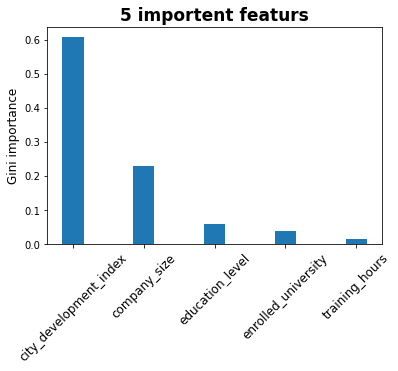

In [309]:
dict_dt = dict(zip(X_train.columns, model_DT.best_estimator_.feature_importances_))
importance = model_DT.best_estimator_.feature_importances_
x_val = sorted(dict_dt, key=dict_dt.get,reverse=True)[:5]
y_val = sorted(importance,reverse=True)[:5]
plt.bar(x_val, y_val, width= 0.3)
plt.xticks(x_val, rotation=45, fontsize='12')
plt.ylabel("Gini importance",fontsize='12' )
plt.title('5 importent featurs', fontweight='bold', fontsize='17')

In [310]:
print(x_val)

['city_development_index', 'company_size', 'education_level', 'enrolled_university', 'training_hours']


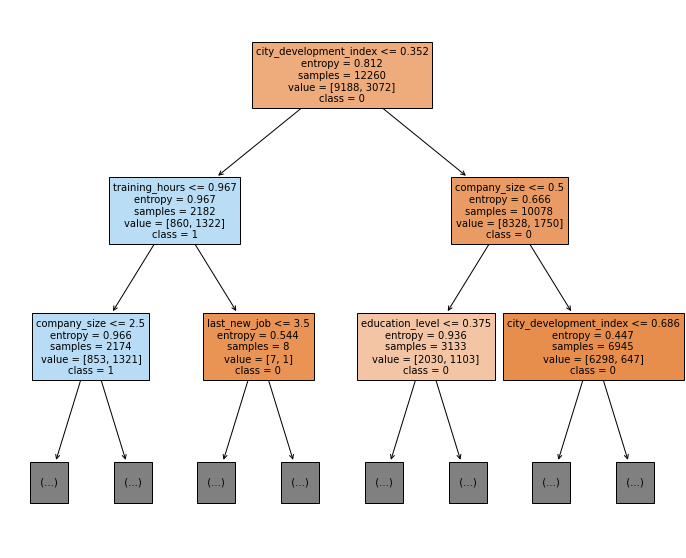

In [113]:
plt.figure(figsize=(12, 10))
plot_tree(model_DT.best_estimator_, filled=True, max_depth=2,feature_names = X_train.columns, class_names=['0', '1'], fontsize=10)
plt.show()

## ANN

In [120]:
from sklearn.neural_network import MLPClassifier

In [313]:
model_MLP = MLPClassifier(random_state=1)
model_MLP.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [314]:
print("Roc_Auc_Score- train_set:",roc_auc_score(Y_train, model_MLP.predict(X_train)))
print("Roc_Auc_Score - val_set:",roc_auc_score(Y_test, model_MLP.predict(X_test)))
print(confusion_matrix(y_true=Y_train, y_pred=model_MLP.predict(X_train)))

Roc_Auc_Score- train_set: 0.6922568272928458
Roc_Auc_Score - val_set: 0.6344901414661286
[[8426  762]
 [1636 1436]]


### Hyper parameter Tuning - for each parameter in separate:

#### Tuning hidden_layer_sizes

In [199]:
train_accs = []
test_accs = []
for size_ in range(1, 50, 2):
    print(f"size: {size_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(size_, size_),
                          max_iter=100,
                          activation='relu',
                          learning_rate_init=0.001,
                          learning_rate ="constant",
                          alpha=0.0001)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

size: 1
size: 3


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 5


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 7


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 9


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 11


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 13


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 15


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 17


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 19


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 21


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 23


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 25


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 27


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 29


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 31


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 33


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 35


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 37


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 39


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 41


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 43


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 45


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 47


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


size: 49


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


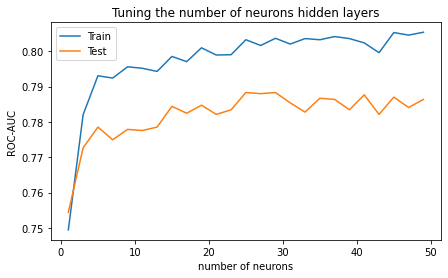

In [200]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, 50, 2), train_accs, label='Train')
plt.plot(range(1, 50, 2), test_accs, label='Test')
plt.legend()
plt.xlabel('number of neurons')
plt.ylabel('ROC-AUC')
plt.title('Tuning the number of neurons hidden layers')
plt.show()

### Tuning max_iter

In [201]:
train_accs = []
test_accs = []
for max_iter_ in [10, 30, 50, 70, 100, 200, 400]:
    print(f"iter: {max_iter_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(17,17),
                          max_iter= max_iter_,
                          activation="relu",
                          learning_rate_init=0.001,
                          learning_rate ="constant",
                          alpha=0.0001)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

iter: 10
iter: 30


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


iter: 50


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


iter: 70


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(


iter: 100


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


iter: 200
iter: 400


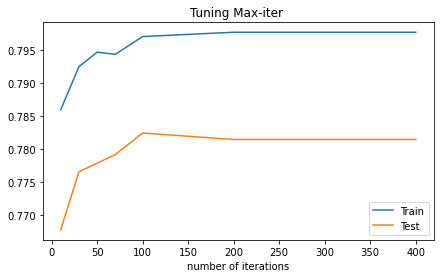

In [202]:
plt.figure(figsize=(7, 4))
plt.plot([10, 30, 50, 70, 100, 200, 400], train_accs, label='Train')
plt.plot([10, 30, 50, 70, 100, 200, 400], test_accs, label='Test')
plt.legend()
plt.xlabel('number of iterations')
plt.title('Tuning Max-iter ')
plt.show()

### Tuning solver

In [203]:
train_accs = []
test_accs = []
for solver_ in ["sgd","lbfgs", "adam"]:
    print(f"solver: {solver_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(17,17),
                          max_iter=100,
                          activation="relu",
                          solver = solver_,
                          learning_rate_init=0.001,
                          learning_rate ="constant",
                          alpha=0.0001)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

solver: sgd


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


solver: lbfgs


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


solver: adam


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


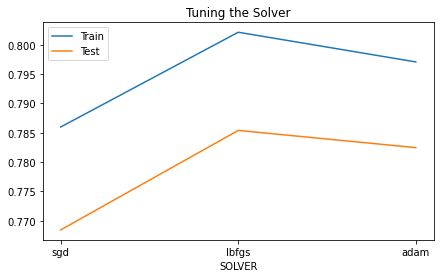

In [204]:
plt.figure(figsize=(7, 4))
plt.plot(["sgd","lbfgs", "adam"], train_accs, label='Train')
plt.plot(["sgd","lbfgs", "adam"], test_accs, label='Test')
plt.legend()
plt.xlabel('SOLVER')
plt.title('Tuning the Solver')
plt.show()

### Tuning activation

In [205]:
train_accs = []
test_accs = []
for act_ in ["relu", "logistic", "tanh"]:
    print(f"act_func: {act_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(17,17),
                          max_iter=100,
                          activation=act_,
                          solver = "adam",
                          learning_rate_init=0.001,
                          learning_rate ="constant",
                          alpha=0.0001)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

act_func: relu


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


act_func: logistic
act_func: tanh


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


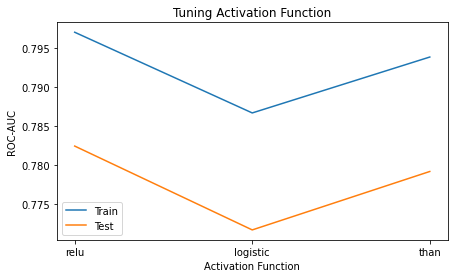

In [206]:
plt.figure(figsize=(7, 4))
plt.plot(["relu", "logistic", "than"], train_accs, label='Train')
plt.plot(["relu", "logistic", "than"], test_accs, label='Test')
plt.legend()
plt.xlabel('Activation Function')
plt.ylabel('ROC-AUC')
plt.title('Tuning Activation Function')
plt.show()

### Tuning learning_rate_init¶

In [207]:
train_accs = []
test_accs = []
for learning_rare_ in [0.001, 0.05, 0.01, 0.1]:
    print(f"learning_rare: {learning_rare_}")
    model = MLPClassifier(random_state=1,
                          hidden_layer_sizes=(17,17),
                          max_iter=100,
                          activation="relu",
                          solver = "adam",
                          learning_rate_init= learning_rare_,
                          alpha=0.0001)
    model.fit(X_train, Y_train)
    train_acc = model.score(X_train, Y_train)
    train_accs.append(train_acc)
    test_acc = model.score(X_test, Y_test)
    test_accs.append(test_acc)

learning_rare: 0.001


C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


learning_rare: 0.05
learning_rare: 0.01
learning_rare: 0.1


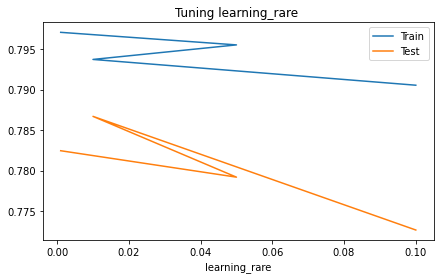

In [208]:
plt.figure(figsize=(7, 4))
plt.plot( [0.001, 0.05, 0.01, 0.1], train_accs, label='Train')
plt.plot( [0.001, 0.05, 0.01, 0.1], test_accs, label='Test')
plt.legend()
plt.xlabel('learning_rare')
plt.title('Tuning learning_rare ')
plt.show()

### Checking the sanity of learning

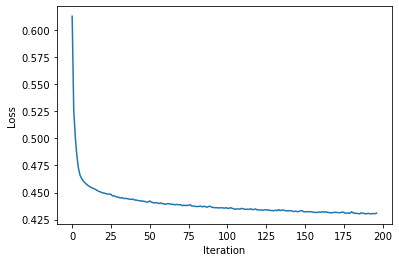

In [209]:
plt.plot(model_MLP.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

### Best model

In [315]:
model_MLP = MLPClassifier(random_state=1,
                       hidden_layer_sizes=(25,25),
                       max_iter= 100,
                       activation="relu",
                       learning_rate_init=0.01,
                       solver = "lbfgs")
                        
model_MLP.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(25, 25), learning_rate_init=0.01,
              max_iter=100, random_state=1, solver='lbfgs')

In [316]:
print("train_set:", model_MLP.score(X_train, Y_train))
print("val_set:", model_MLP.score(X_test, Y_test))
print(confusion_matrix(y_true=Y_train, y_pred=model_MLP.predict(X_train)))
print(confusion_matrix(y_true=Y_test, y_pred=model_MLP.predict(X_test)))

train_set: 0.7898042414355628
val_set: 0.7671232876712328
[[8329  859]
 [1718 1354]]
[[2058  255]
 [ 459  294]]


In [266]:
from sklearn.metrics import plot_confusion_matrix

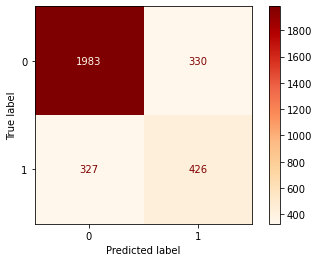

In [275]:
plot_confusion_matrix(model_MLP, X_test, Y_test, cmap = "OrRd" ) 

## SVM

In [212]:
from sklearn.svm import LinearSVC

# Training the Baseline model
model_SVM = LinearSVC(C=1,max_iter = 2000,random_state = 77)
model_SVM.fit(X_train, Y_train)

LinearSVC(C=1, max_iter=2000, random_state=77)

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

print(confusion_matrix(y_true=Y_train, y_pred=model_SVM.predict(X_train)))
print("Roc_Auc_Score on Training Set:",roc_auc_score(Y_train, model_SVM.predict(X_train)))
print("Roc_Auc_Score on Test Set:",roc_auc_score(Y_test, model_SVM.predict(X_test)))
model.coef_

[[8465  723]
 [1923 1149]]
Roc_Auc_Score on Training Set: 0.6476669211879625
Roc_Auc_Score on Test Set: 0.6243284535872937


AttributeError: 'MLPClassifier' object has no attribute 'coef_'

In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10,50, 100,200,500, 1000]
             }
model_SVM = GridSearchCV(estimator=LinearSVC(random_state = 77,max_iter=2000),param_grid = param_grid)
model_SVM.fit(X_train,Y_train)
model_SVM.best_estimator_

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

LinearSVC(C=50, max_iter=2000, random_state=77)

In [215]:
best_model_svm = model_SVM.best_estimator_
# print (best_model.best_score_, best_model.best_params_) 
prediction = best_model_svm.predict(X_test)
print("Best Roc_Auc_Score on Cross-Validation Set:",round(GS.best_score_, 3))
print("Best Parameters: " ,GS.best_params_)
print(confusion_matrix(y_true=Y_test, y_pred= model_SVM.predict(X_test)))
best_model.coef_

Best Roc_Auc_Score on Cross-Validation Set: 0.77
Best Parameters:  {'C': 1}
[[2105  208]
 [ 493  260]]


array([[-1.15969074, -0.02034318,  0.13388832,  0.29574959, -0.10471694,
        -0.01841594,  0.02585845, -0.12651567,  0.02067313,  0.01428698,
         0.08123535,  0.08676185, -0.00386848,  0.06167777, -0.0139167 ,
         0.05249518,  0.01852018,  0.08804935,  0.24192657, -0.03095157,
         0.05061812, -0.00302851,  0.13182474, -0.08856289, -0.09886916]])

In [216]:
print("train_set:", roc_auc_score(Y_train, best_model_svm.predict(X_train)))
print("val_set:", roc_auc_score(Y_test, best_model_svm.predict(X_test)))

train_set: 0.6534669173332971
val_set: 0.6276795110952645


In [146]:
results = pd.DataFrame([[GS.best_params_,round(roc_auc_score(Y_test, prediction),3),round(roc_auc_score(Y_train, best_model.predict(X_train)),3)]],columns = ['parameter','val_acc','train_a'])
results.head()

,parameter,val_acc,train_a
0,{'C': 1},0.58,0.604


## Evaluation

In [155]:
from sklearn.metrics import classification_report

In [226]:
print("Desicion Tree")
print(classification_report(Y_test,model_DT.predict(X_test)))
print("Roc_Auc_Score: train_set",roc_auc_score(Y_train, best_model_DT.predict(X_train)))
print("Roc_Auc_Score: val_set ",roc_auc_score(Y_test, best_model_DT.predict(X_test)))

Desicion Tree
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2313
           1       0.55      0.59      0.57       753

    accuracy                           0.78      3066
   macro avg       0.71      0.72      0.71      3066
weighted avg       0.79      0.78      0.78      3066

Roc_Auc_Score: train_set 0.7508077791684806
Roc_Auc_Score: val_set  0.717432044412062


In [219]:
print("ANN")
print(classification_report(Y_test,model_MLP.predict(X_test)))    
print("Roc_Auc_Score: train_set:", model_MLP.score(X_train, Y_train))
print("Roc_Auc_Score: val_set:", model_MLP.score(X_test, Y_test))

ANN
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2313
           1       0.56      0.57      0.56       753

    accuracy                           0.79      3066
   macro avg       0.71      0.71      0.71      3066
weighted avg       0.79      0.79      0.79      3066

Roc_Auc_Score: train_set: 0.8025285481239804
Roc_Auc_Score: val_set: 0.7857142857142857


In [249]:
print("Roc_Auc_Score: train_set:", roc_auc_score(Y_train, model_MLP.predict(X_train)))
print("Roc_Auc_Score: val_set:", roc_auc_score(Y_test, model_MLP.predict(X_test)))

Roc_Auc_Score: train_set: 0.742900825692026
Roc_Auc_Score: val_set: 0.7115325985293586


In [220]:
print("SVM")
print(classification_report(Y_test,model_SVM.predict(X_test)))
print("Roc_Auc_Score: train_set:", roc_auc_score(Y_train, best_model_svm.predict(X_train)))
print("Roc_Auc_Score: val_set:", roc_auc_score(Y_test, best_model_svm.predict(X_test)))

SVM
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2313
           1       0.56      0.35      0.43       753

    accuracy                           0.77      3066
   macro avg       0.68      0.63      0.64      3066
weighted avg       0.75      0.77      0.75      3066

Roc_Auc_Score: train_set: 0.6534669173332971
Roc_Auc_Score: val_set: 0.6276795110952645


## Improvment

In [234]:
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier

In [258]:
bg_DT = BaggingClassifier(DecisionTreeClassifier(),n_estimators = 20)
bg_DT.fit(X_train, Y_train)
print(bg_DT.score(X_train, Y_train))
print("Roc_Auc_Score: train_set:", roc_auc_score(Y_train, bg_DT.predict(X_train)))
print("Roc_Auc_Score: val_set:", roc_auc_score(Y_test, bg_DT.predict(X_test)))

0.9438825448613377
Roc_Auc_Score: train_set: 0.9221484403343129
Roc_Auc_Score: val_set: 0.6635378072663949


In [245]:
bg_MLP = BaggingClassifier(MLPClassifier(),n_estimators = 20)
bg_MLP.fit(X_train, Y_train)
bg_MLP.score(X_train, Y_train)
print("Roc_Auc_Score: train_set:", roc_auc_score(Y_train, bg_MLP.predict(X_train)))
print("Roc_Auc_Score: val_set:", roc_auc_score(Y_test, bg_MLP.predict(X_test)))

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Roc_Auc_Score: train_set: 0.7183597151175446
Roc_Auc_Score: val_set: 0.6886927000170524


In [265]:
print("train_set:", bg_MLP.score(X_train, Y_train))
print("val_set:", bg_MLP.score(X_test, Y_test))

train_set: 0.8019575856443719
val_set: 0.7857142857142857
